In [83]:
import pandas as pd

# Cargar el dataset
data = pd.read_csv(r"C:\Users\diego\OneDrive\Documentos\Trabajos de cursos\Sena\Introducción al Machine Learning\Mall_Customers.csv")
print("Primeras filas del dataset:")
print(data.head())
print("\nColumnas disponibles:", data.columns.tolist())


Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Columnas disponibles: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [84]:
#Selección de muestra de prueba aleatoria
RANDOM_STATE = 42
muestra = data.sample(n=3, random_state=RANDOM_STATE)
data_train = data.drop(muestra.index).reset_index(drop=True)
muestra = muestra.reset_index(drop=True)

In [85]:
#Eliminación de variables irrelevantes
columnas_a_eliminar = ['CustomerID', 'Gender']
data_train = data_train.drop(columns=columnas_a_eliminar, errors='ignore')
muestra = muestra.drop(columns=columnas_a_eliminar, errors='ignore')
print("Variables utilizadas para clustering:", data_train.columns.tolist())

Variables utilizadas para clustering: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [86]:
#Escalamiento (normalización) de los datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_train_scaled = scaler.fit_transform(data_train)
muestra_scaled = scaler.transform(muestra)


C:\Users\diego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\diego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\diego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\diego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

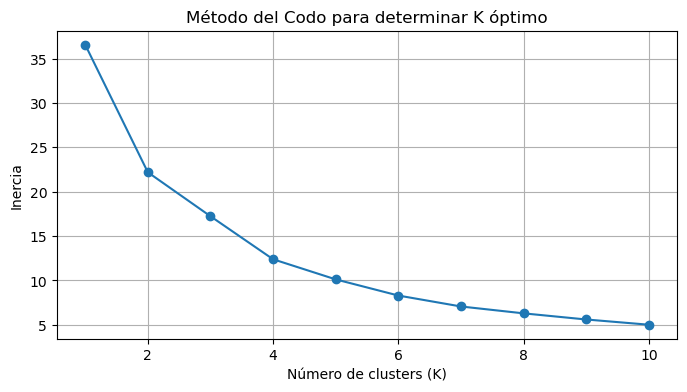

In [87]:
# Determinación del valor óptimo de K (Método del Codo)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inercia = []
K_MAX = 10
for k in range(1, K_MAX + 1):
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans.fit(data_train_scaled)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, K_MAX + 1), inercia, marker='o')
plt.title('Método del Codo para determinar K óptimo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [90]:
#Entrenamiento del modelo y obtención de centroides
K_OPTIMO = 5  # Ajustar según el gráfico del codo
kmeans = KMeans(n_clusters=K_OPTIMO, random_state=RANDOM_STATE)
kmeans.fit(data_train_scaled)
labels = kmeans.labels_
centroides = kmeans.cluster_centers_

C:\Users\diego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [91]:
#Predicción de la muestra de prueba
predicciones = kmeans.predict(muestra_scaled)
print("Clusters asignados a la muestra de prueba:", predicciones)

Clusters asignados a la muestra de prueba: [0 2 1]


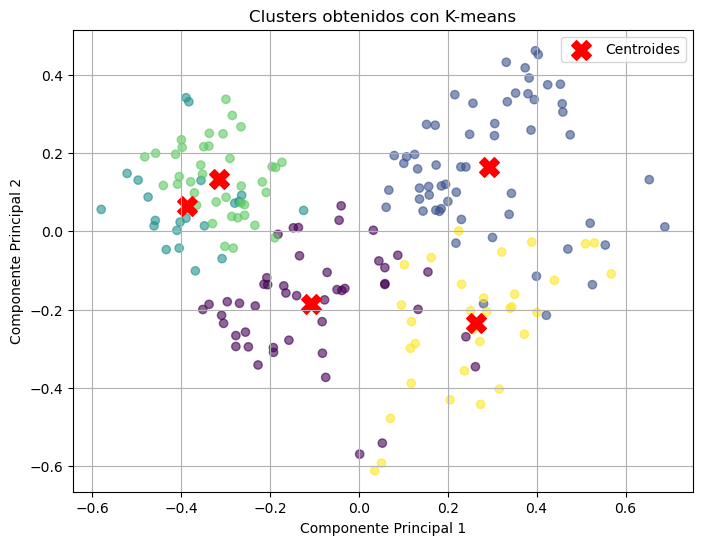

In [92]:
#Visualización de los clústeres
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_train_scaled)
centroides_pca = pca.transform(centroides)

plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], c='red', marker='X', s=200, label='Centroides')
plt.title('Clusters obtenidos con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
#Interpretación de los clústeres
data_train['Cluster'] = labels
print(data_train.groupby('Cluster').mean())


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        27.851064           50.297872               43.744681
1        55.534483           49.189655               41.896552
2        25.428571           26.000000               79.380952
3        32.692308           86.538462               82.128205
4        41.406250           89.500000               17.156250


C:\Users\diego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


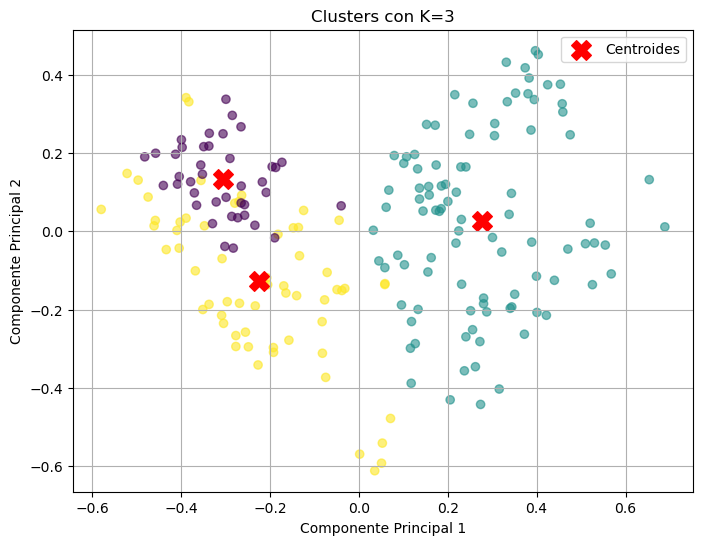

C:\Users\diego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


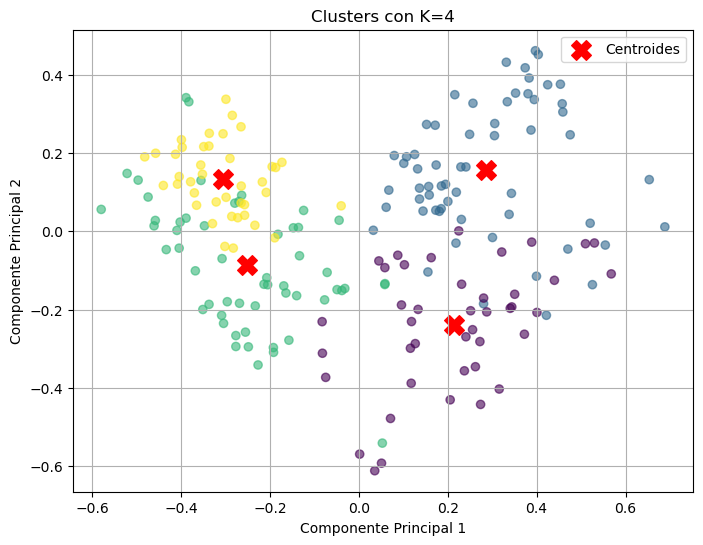

C:\Users\diego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


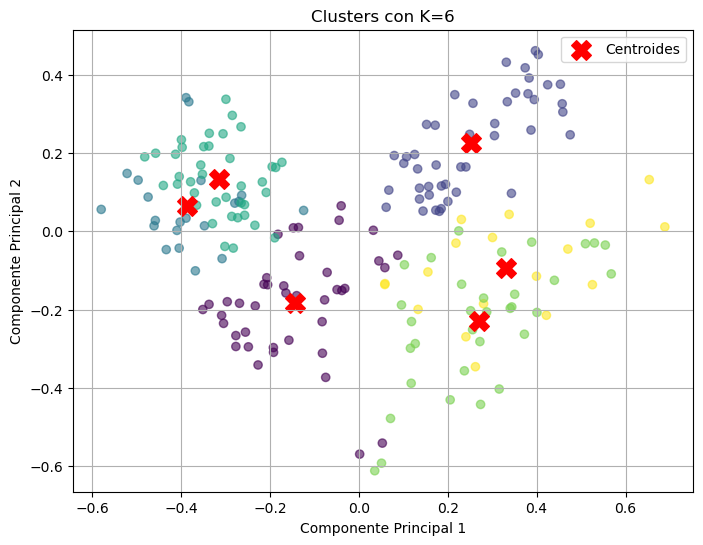

In [94]:
#Comparación al variar el valor de K
for new_k in [3, 4, 6]:
    kmeans_new = KMeans(n_clusters=new_k, random_state=RANDOM_STATE)
    kmeans_new.fit(data_train_scaled)
    labels_new = kmeans_new.labels_
    centroides_new = kmeans_new.cluster_centers_
    centroides_new_pca = pca.transform(centroides_new)
    plt.figure(figsize=(8,6))
    plt.scatter(data_pca[:,0], data_pca[:,1], c=labels_new, cmap='viridis', alpha=0.6)
    plt.scatter(centroides_new_pca[:,0], centroides_new_pca[:,1], c='red', marker='X', s=200, label='Centroides')
    plt.title(f'Clusters con K={new_k}')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.grid(True)
    plt.show()